Chatgpt slop: a starting point for modeling and evaluation of Colombian Bird Calls

Making Spectrograms from Audio Files

In [7]:
!pip install librosa



In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio
y, sr = librosa.load('audio_file.wav')

# Compute spectrogram (mel-scale)
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot it
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


/var/folders/qy/lv3qy4_j6ll2fhx0ljgq_x140000gp/T/ipykernel_75394/825020461.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('audio_file.wav')
/opt/anaconda3/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'audio_file.wav'

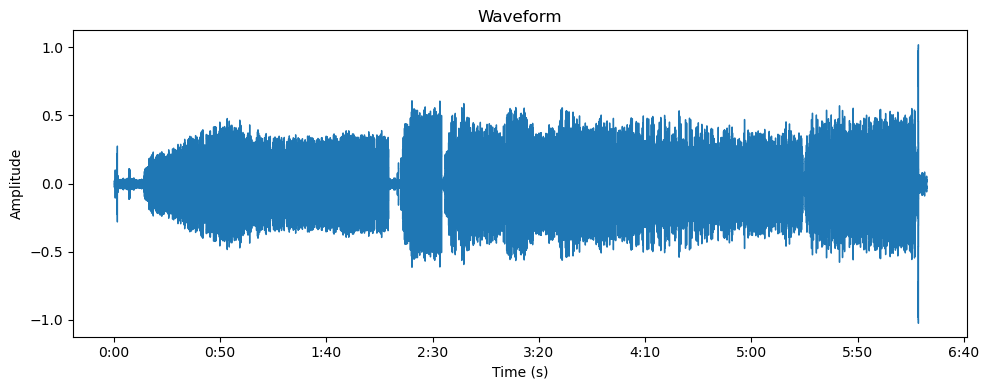

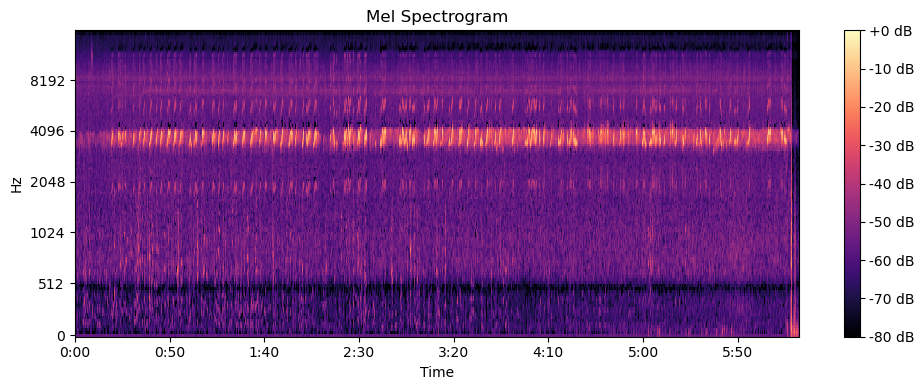

In [ ]:
y, sr = librosa.load('/Users/a13015/Desktop/Spring2025/birdclef-2025/train_audio/21038/iNat65519.ogg', sr=None)

# audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Mel Spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# converting to decibels
S_dB = librosa.power_to_db(S, ref=np.max)

# plotting Mel Spectrogram
# Short-Time Fourier Transform (STFT)
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Paths
source_dir = '/Users/a13015/Desktop/Spring2025/birdclef-2025/train_audio'  # <-- Change this to your actual path
output_dir = '//Users/a13015/Desktop/Spring2025/birdclef-2025/converted_audio'  # <-- This is where JPEGs will be saved

# Create output dir if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each class folder
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(('.ogg')):  # Add other formats if needed
            full_path = os.path.join(root, file)
            
            # Get relative path and class folder
            rel_path = os.path.relpath(full_path, source_dir)
            class_folder = os.path.dirname(rel_path)
            output_class_dir = os.path.join(output_dir, class_folder)
            os.makedirs(output_class_dir, exist_ok=True)

            # Load audio
            y, sr = librosa.load(full_path, sr=None)
            
            # Create Mel Spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Plot and save JPEG
            plt.figure(figsize=(4, 4))
            librosa.display.specshow(S_dB, sr=sr, x_axis=None, y_axis=None)
            plt.axis('off')
            output_file = os.path.splitext(file)[0] + '.jpg'
            output_path = os.path.join(output_class_dir, output_file)
            plt.savefig(output_path, dpi=100, bbox_inches='tight', pad_inches=0)
            plt.close()


: 

In [ ]:
import shutil
import random
import os

# Paths
source_dir = '/Users/a13015/Desktop/Spring2025/birdclef-2025/converted_audio'
train_dir = '/Users/a13015/Desktop/Spring2025/birdclef-2025/train_split'
test_dir = '/Users/a13015/Desktop/Spring2025/birdclef-2025/test_split'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through class folders
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
    random.shuffle(images)  # Shuffle images randomly

    split_idx = int(0.7 * len(images))  # 70% for training
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    # Create class subfolders inside train/ and test/
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy images
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy2(src, dst)

    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, class_name, img)
        shutil.copy2(src, dst)

print('✅ Split complete!')


✅ Split complete!


In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 13.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0


In [9]:
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [ ]:
train_transforms = transforms.Compose([
    transforms.ToTensor,
    transforms.Resize((128,128)),
])

dataset_train = ImageFolder(
    '//Users/a13015/Desktop/Spring2025/birdclef-2025/train_split',
    transform=train_transforms,
)

In [15]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        # Define classifier
        self.classifier = nn.Linear(64 * 56 * 56, num_classes)
    
    def forward(self, x):  
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.ToTensor(),          # Converts PIL Image to Tensor [C, H, W]
])


In [ ]:
from torch.utils.data import DataLoader



dataloader_train= DataLoader(dataset_train,    
                              shuffle=True,     
                              batch_size=1,)



In [10]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset_train = datasets.ImageFolder(
    root='/Users/a13015/Desktop/Spring2025/birdclef-2025/train_split',
    transform=transform
)

dataloader_train = DataLoader(dataset_train, shuffle=True, batch_size=1)

# Test a batch
image, label = next(iter(dataloader_train))
print(image.shape)  # Should be [1, 3, 224, 224]


torch.Size([1, 3, 224, 224])


In [11]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dataset_test = datasets.ImageFolder(
    root='/Users/a13015/Desktop/Spring2025/birdclef-2025/test_split',
    transform=transform
)

dataloader_test = DataLoader(dataset_test, shuffle=True, batch_size=1)

# Test a batch
image, label = next(iter(dataloader_test))
print(image.shape)  # Should be [1, 3, 224, 224]


torch.Size([1, 3, 224, 224])


In [16]:
import torch.optim as optim

# Define the model
net = Net(num_classes=52)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(net.parameters(),lr=0.001)

for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images,labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 5.1880
Epoch 2, Loss: 4.7077
Epoch 3, Loss: 3.7155


In [ ]:

import torch
from torchmetrics import Precision, Recall
metric_precision = Precision(task="multiclass", num_classes=52, average="macro")
metric_recall = Recall(task="multiclass", num_classes=52, average="macro")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.24572975933551788
Recall: 0.21561747789382935


In [18]:
import torch
from torchmetrics import Precision, Recall
metric_precision = Precision(
    task="multiclass", num_classes=52, average=None
)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
precision = metric_precision.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v 
    in dataset_test.class_to_idx.items()
}
print(precision_per_class)

{'21038': 0.0, '21116': 0.0, '22333': 1.0, '24292': 0.0, '24322': 0.0, '41778': 0.0, '41970': 0.0, '42087': 0.0, '46010': 0.0, '476537': 0.0, '476538': 0.0, '48124': 0.25, '50186': 0.21052631735801697, '52884': 0.20000000298023224, '548639': 1.0, '555142': 0.0, '66016': 1.0, '66531': 0.0, '787625': 0.0, '868458': 0.0, '963335': 1.0, 'amakin1': 0.1666666716337204, 'ampkin1': 0.021978022530674934, 'bafibi1': 0.0, 'baymac': 0.20879121124744415, 'blbgra1': 0.6014492511749268, 'blcant4': 0.0, 'brtpar1': 0.1666666716337204, 'butsal1': 0.30180180072784424, 'cinbec1': 0.0, 'compau': 0.6582733988761902, 'cotfly1': 0.517241358757019, 'crbtan1': 0.5, 'crcwoo1': 0.23076923191547394, 'greani1': 0.2800000011920929, 'greegr': 0.33136093616485596, 'greibi1': 0.7333333492279053, 'grnkin': 0.10000000149011612, 'gybmar': 0.30000001192092896, 'leagre': 0.0, 'norscr1': 0.0, 'plukit1': 0.0, 'recwoo1': 1.0, 'rosspo1': 0.0, 'royfly1': 0.0, 'rutjac1': 0.26724138855934143, 'savhaw1': 0.0, 'spepar1': 0.235294118

In [ ]:
import os

file_path = '/Users/a13015/Desktop/Spring2025/birdclef-2025/train_audio/21038/iNat65519.ogg'
print(os.path.exists(file_path))


True


In [ ]:
import os
os.getcwd()

'/Users/a13015/Downloads'

Evaluation Metric used for competition

In [ ]:
import pandas as pd
import pandas.api.types

import kaggle_metric_utilities

import sklearn.metrics


class ParticipantVisibleError(Exception):
    pass


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    '''
    Version of macro-averaged ROC-AUC score that ignores all classes that have no true positive labels.
    '''
    del solution[row_id_column_name]
    del submission[row_id_column_name]

    if not pandas.api.types.is_numeric_dtype(submission.values):
        bad_dtypes = {x: submission[x].dtype  for x in submission.columns if not pandas.api.types.is_numeric_dtype(submission[x])}
        raise ParticipantVisibleError(f'Invalid submission data types found: {bad_dtypes}')

    solution_sums = solution.sum(axis=0)
    scored_columns = list(solution_sums[solution_sums > 0].index.values)
    assert len(scored_columns) > 0

    return kaggle_metric_utilities.safe_call_score(sklearn.metrics.roc_auc_score, solution[scored_columns].values, submission[scored_columns].values, average='macro')